In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format = 'retina'

# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
% ls ../figures

KDR10_w_aneur.png                       med_asi_2_osi.png
KDRdiagram.png                          med_asi_2_tawss.png
aneurysm_examples.jpg                   med_asi_2_tawss_rescale.png
aneurysm_panel_figure.png               pipeline.png
asi_4_overlay.png                       potential_threshold.png
asi_6_overlay.png                       prox_asi_2_osi.png
baseline.png                            prox_asi_2_tawss.png
baseline_1.png                          prox_asi_2_tawss_rescale.png
baseline_2.png                          prox_asi_4_tawss_rescale.png
baseline_3.png                          prox_asi_6_osi.png
dist_asi_2_RT_unclipped.png             prox_asi_6_tawss.png
dist_asi_2_osi.png                      prox_asi_6_tawss_rescale.png
dist_asi_2_tawss.png                    recirculation_distal_tawss_streams.png
dist_asi_2_tawss_rescale.png            streams/
figures.pptx                            test.pdf
lad_asi_2_osi.png                       test.png
lad_asi_2_tawss.png     

In [3]:
SPINE_COLOR = 'gray'
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              #'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [4]:
# matplotlib.rcParams.keys()
latexify()

In [5]:
surface_flows = {
    'ASI2': {
        'p1': [], 
        'p2': [0.674213, 0.168309, 1.28855, 1.46201, 1.56027, 1.57506, 1.44291, 1.23955, 1.49607, 1.47865, 1.40337, 1.3355, 1.28018, 1.2233, 1.19538, 1.12751, 1.03351, 0.898732, 0.764525, 0.654741, 0.669684], 
        'p3': [], 
        'p4': [], 
        'p5': [0.676552, 0.165113, 1.29078, 1.46468, 1.56372, 1.57745, 1.44355, 1.24877, 1.49698, 1.47841, 1.40561, 1.33748, 1.2823, 1.22519, 1.19737, 1.12898, 1.03454, 0.899814, 0.765593, 0.655473, 0.671998], 
        'm1': [],
        'm2': [0.530067, 0.131479, 1.00809, 1.13898, 1.21778, 1.23228, 1.13264, 0.971884, 1.17378, 1.15803, 1.09935, 1.04677, 1.00371, 0.95927, 0.937363, 0.884064, 0.810088, 0.704288, 0.599804, 0.514586, 0.526571],
        'm3': [],
        'm4': [],
        'm5': [0.534548, 0.127027, 1.01849, 1.15052, 1.22849, 1.24206, 1.13808, 0.984245, 1.18297, 1.16606, 1.10722, 1.05392, 1.01067, 0.965599, 0.94376, 0.889565, 0.814329, 0.707741, 0.602651, 0.516729, 0.530966],
        'd1': [],
        'd2': [0.341075, 0.0824549, 0.643403, 0.724342, 0.776145, 0.787427, 0.726221, 0.622381, 0.75256, 0.741433, 0.704269, 0.670999, 0.643554, 0.61503, 0.600918, 0.566769, 0.518976, 0.451053, 0.384822, 0.330945, 0.338817], 
        'd3': [], 
        'd4': [], 
        'd5': [0.344622, 0.0811763, 0.649892, 0.730897, 0.782861, 0.792866, 0.728852, 0.632055, 0.757796, 0.746488, 0.709336, 0.675728, 0.648277, 0.619538, 0.605529, 0.570874, 0.522301, 0.454037, 0.387518, 0.33312, 0.342296],
    },
}

baseline_flows = {
    'prox': [0.669623, 0.177523, 1.28112, 1.45484, 1.55434, 1.57226, 1.44339, 1.22614, 1.49471, 1.47362, 1.39891, 1.33101, 1.27567, 1.21921, 1.191, 1.12377, 1.03082, 0.896138, 0.762239, 0.653081, 0.665097],
    'med': [0.523276, 0.141148, 0.995021, 1.12718, 1.20681, 1.22357, 1.12769, 0.954082, 1.16608, 1.14903, 1.09144, 1.03885, 0.995707, 0.951761, 0.929582, 0.877328, 0.804782, 0.699556, 0.595678, 0.511319, 0.519812],
    'dist': [0.32976, 0.0912662, 0.619347, 0.699782, 0.751774, 0.765087, 0.709552, 0.596006, 0.730948, 0.720358, 0.685083, 0.652478, 0.625453, 0.598006, 0.583932, 0.551415, 0.506026, 0.440009, 0.375444, 0.323262, 0.327593], 
}

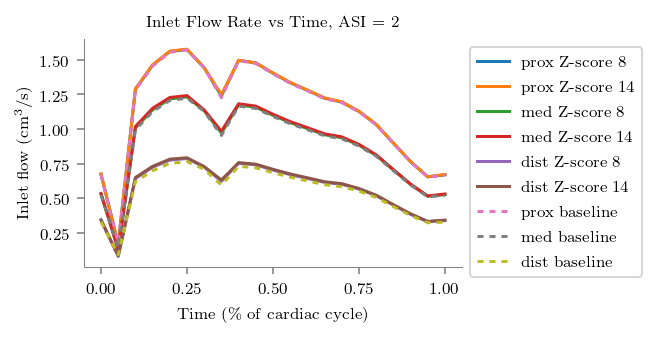

In [11]:
shape = 'ASI2'
prox = ['p2', 'p5']
med = ['m2', 'm5']
dist = ['d2', 'd5']
z_scores = ["8", "14"]
fig, ax = plt.subplots()#figsize=(7,7)) 


for pos, pos_str in zip([prox, med, dist], ['prox', 'med', 'dist']): 
    for size, z in zip(pos, z_scores): 
        ax.plot(np.arange(0, 1050, 50)/1000., surface_flows[shape][size], label=' '.join([pos_str, 'Z-score', z]))
        

for pos in ['prox', 'med', 'dist']: 
    ax.plot(np.arange(0, 1050, 50)/1000., baseline_flows[pos], label="{} baseline".format(pos), dashes=[2,2])
    
    
    
ax.set_xlabel(r'Time ($\%$ of cardiac cycle)')
ax.set_xticks([0, .25, .5, .75, 1.])
ax.set_ylabel(r'Inlet flow (cm$^3$/s)')
plt.title('Inlet Flow Rate vs Time, ASI = 2')
# plt.legend()
ax.legend(bbox_to_anchor=(1., 1), ncol=1)
format_axes(ax)
plt.savefig("../figures/flows.eps", bbox_inches='tight')
plt.show()

